In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [2]:
file_path = "../dataset5/OnlyNonTrivial_dt.csv"
data = pd.read_csv(file_path)

In [3]:
data

,refactoring,file,class,type,cbo,cboModified,fanin,fanout,wmc,dit,...,assignmentsQty,mathOperationsQty,variablesQty,maxNestedBlocksQty,anonymousClassesQty,innerClassesQty,lambdasQty,uniqueWordsQty,modifiers,logStatementsQty
0,1,\DATASET\abfiles\r0\c17\after\ActiveFiltersPan...,mtgdeckbuilder.frontend.ActiveFiltersPanelTest,class,4,4,0,4,4,1,...,9,0,9,0,0,0,0,55,1,0
1,1,\DATASET\abfiles\r0\c17\after\TagViewerTest.java,mtgdeckbuilder.frontend.TagViewerTest,class,6,7,1,6,7,1,...,21,0,17,1,0,0,0,50,1,0
2,1,\DATASET\abfiles\r0\c17\after\TagTopicTest.java,mtgdeckbuilder.frontend.topics.TagTopicTest,class,4,4,0,4,5,1,...,3,0,3,0,0,0,0,22,1,0
3,1,\DATASET\abfiles\r0\c17\after\TagAddPanel.java,mtgdeckbuilder.frontend.TagAddPanel$Anonymous1,anonymous,1,1,0,1,2,1,...,0,0,0,1,0,0,0,5,-1,0
4,1,\DATASET\abfiles\r0\c17\after\TagTopic.java,mtgdeckbuilder.frontend.topics.TagTopic,class,1,13,12,1,9,1,...,1,0,1,1,0,1,0,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509421,0,\DATASET\abfiles\r882\c1027\before\MapPersiste...,ca.concordia.soen6441.io.MapPersister,class,2,3,1,2,2,1,...,5,0,5,0,0,0,0,22,1,0
509422,0,\DATASET\abfiles\r882\c1027\before\TestEnemy.java,ca.concordia.soen6441.logic.TestEnemy,class,8,8,0,8,7,1,...,2,0,2,0,0,0,0,18,1,0
509423,0,\DATASET\abfiles\r882\c1027\before\Tile.java,ca.concordia.soen6441.logic.Tile$TileType,enum,0,0,0,0,0,1,...,0,0,0,0,0,0,0,12,1,0
509424,0,\DATASET\abfiles\r882\c1027\before\HasTiles.java,ca.concordia.soen6441.logic.IHasTiles,interface,2,2,0,2,2,1,...,0,0,0,0,0,0,0,9,1,0


In [4]:
data = data.drop(["file"], axis=1)
data = data.drop(["class"], axis=1)

In [5]:
data["type"].unique()

array(['class', 'anonymous', 'interface', 'innerclass', 'enum'],
      dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data["type_encoded"] = label_encoder.fit_transform(data["type"])

In [7]:
data = data.drop(["type"], axis=1)

In [8]:
print(data.isnull().sum())

refactoring                    0
cbo                            0
cboModified                    0
fanin                          0
fanout                         0
wmc                            0
dit                            0
noc                            0
rfc                            0
lcom                           0
lcom*                       9584
tcc                       163950
lcc                       163950
totalMethodsQty                0
staticMethodsQty               0
publicMethodsQty               0
privateMethodsQty              0
protectedMethodsQty            0
defaultMethodsQty              0
visibleMethodsQty              0
abstractMethodsQty             0
finalMethodsQty                0
synchronizedMethodsQty         0
totalFieldsQty                 0
staticFieldsQty                0
publicFieldsQty                0
privateFieldsQty               0
protectedFieldsQty             0
defaultFieldsQty               0
finalFieldsQty                 0
synchroniz

In [9]:
data = data.drop(["tcc"], axis=1)
data = data.drop(["lcc"], axis=1)
print(data.isnull().sum())

refactoring                  0
cbo                          0
cboModified                  0
fanin                        0
fanout                       0
wmc                          0
dit                          0
noc                          0
rfc                          0
lcom                         0
lcom*                     9584
totalMethodsQty              0
staticMethodsQty             0
publicMethodsQty             0
privateMethodsQty            0
protectedMethodsQty          0
defaultMethodsQty            0
visibleMethodsQty            0
abstractMethodsQty           0
finalMethodsQty              0
synchronizedMethodsQty       0
totalFieldsQty               0
staticFieldsQty              0
publicFieldsQty              0
privateFieldsQty             0
protectedFieldsQty           0
defaultFieldsQty             0
finalFieldsQty               0
synchronizedFieldsQty        0
nosi                         0
loc                          0
returnQty                    0
loopQty 

In [10]:
data.fillna(data.mean(), inplace=True)

In [11]:
print(data.isnull().sum())

refactoring               0
cbo                       0
cboModified               0
fanin                     0
fanout                    0
wmc                       0
dit                       0
noc                       0
rfc                       0
lcom                      0
lcom*                     0
totalMethodsQty           0
staticMethodsQty          0
publicMethodsQty          0
privateMethodsQty         0
protectedMethodsQty       0
defaultMethodsQty         0
visibleMethodsQty         0
abstractMethodsQty        0
finalMethodsQty           0
synchronizedMethodsQty    0
totalFieldsQty            0
staticFieldsQty           0
publicFieldsQty           0
privateFieldsQty          0
protectedFieldsQty        0
defaultFieldsQty          0
finalFieldsQty            0
synchronizedFieldsQty     0
nosi                      0
loc                       0
returnQty                 0
loopQty                   0
comparisonsQty            0
tryCatchQty               0
parenthesizedExpsQty

In [12]:
X = data.drop(["wmc"], axis=1)
y = data["wmc"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
y_pred = model.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R2 Score: {r2}")

Mean Squared Error (MSE): 0.1804915036556061
Root Mean Squared Error (RMSE): 0.4248429164474866
R2 Score: 0.998963884025078


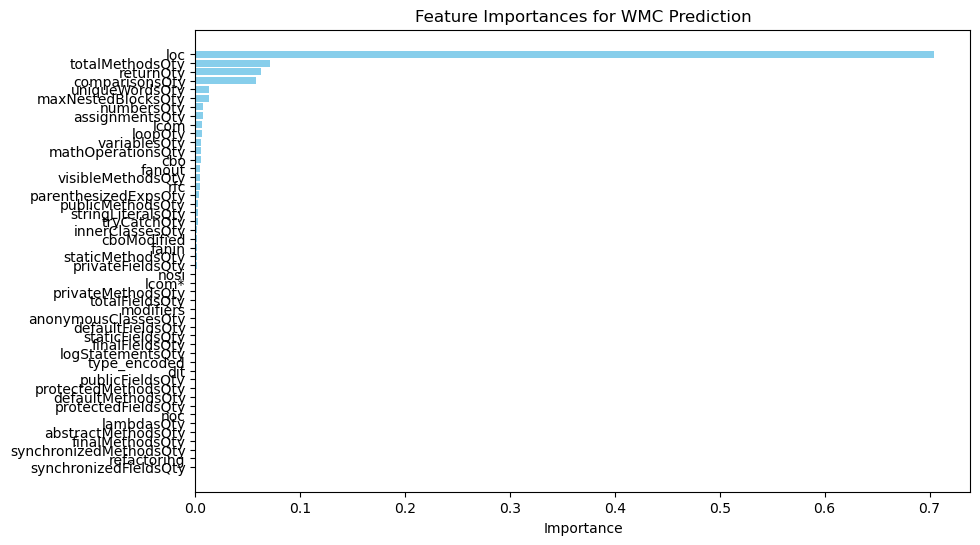

In [16]:
import matplotlib.pyplot as plt

feature_importances = model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Feature Importances for WMC Prediction')
plt.show()

In [17]:
required_columns = ["returnQty", "totalMethodsQty", "comparisonsQty", "uniqueWordsQty", "maxNestedBlocksQty"]

new_data = data[required_columns]

In [18]:
new_data

,returnQty,totalMethodsQty,comparisonsQty,uniqueWordsQty,maxNestedBlocksQty
0,0,4,0,55,0
1,1,6,0,50,1
2,0,5,0,22,0
3,0,1,0,5,1
4,0,5,0,14,1
...,...,...,...,...,...
509421,1,2,0,22,0
509422,0,6,1,18,0
509423,0,0,0,12,0
509424,0,2,0,9,0


In [19]:
X = new_data

X_new_train, X_new_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_new_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
y_pred = model.predict(X_new_test)

In [22]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R2 Score: {r2}")

Mean Squared Error (MSE): 0.3215745258121927
Root Mean Squared Error (RMSE): 0.5670754145721649
R2 Score: 0.9981539934203343


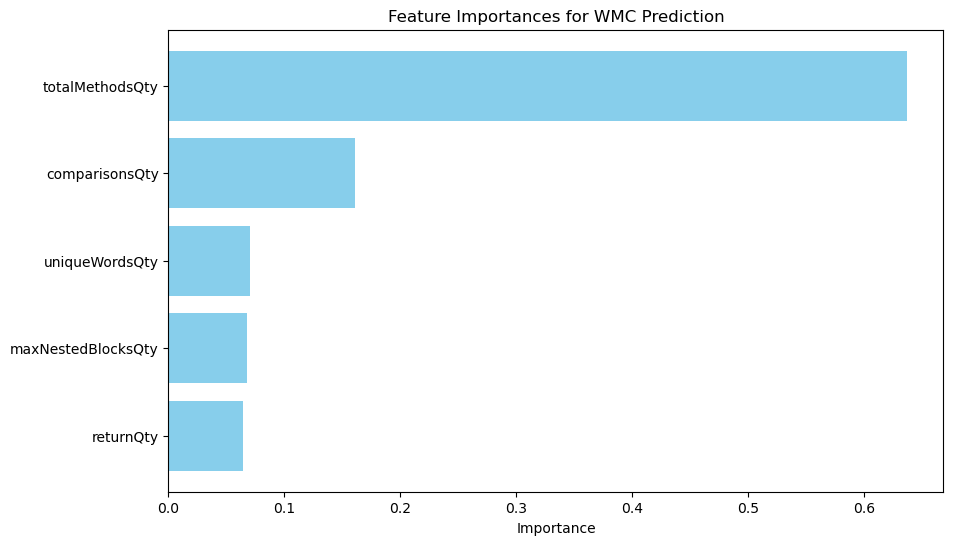

In [23]:
import matplotlib.pyplot as plt

feature_importances = model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Feature Importances for WMC Prediction')
plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV

rf_params = {'max_depth': list(range(5, 11, 2)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500]}

rf_cv_model = GridSearchCV(model,
                           rf_params,
                           cv = 10,
                           n_jobs = 1)

In [25]:
rf_cv_model.fit(X_new_train, y_train)


KeyboardInterrupt



In [ ]:
rf_cv_model.best_params_

In [ ]:
rf_tuned = RandomForestRegressor(max_depth  = 8, 
                                 max_features = 3, 
                                 n_estimators =500)

In [ ]:
rf_tuned.fit(X_new_train, y_train)

In [ ]:
y_pred = rf_tuned.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R2 Score: {r2}")

In [26]:
import joblib
joblib.dump(model, "rf_model.sav")

['rf_model.sav']

In [29]:
y_pred[:50]

array([0.00000000e+00, 4.00000000e+00, 6.00000000e+00, 2.05324200e+00,
       9.00000000e+00, 2.00000000e+00, 1.00009349e+00, 2.99263818e+00,
       1.10000000e+01, 1.00000000e+01, 1.20506792e+00, 1.00000000e+01,
       3.00000000e+00, 1.03763107e+00, 1.00000000e+00, 2.50000000e+01,
       9.00000000e+00, 4.00000000e+00, 2.00575105e+00, 5.00000000e+00,
       3.84970925e+00, 3.00000000e+00, 5.00000000e+00, 3.00000000e+00,
       3.00000000e+00, 1.10000000e+01, 3.04065198e+00, 9.00000000e+00,
       8.30000000e+01, 2.00000000e+00, 2.00000000e+00, 8.00000000e+00,
       1.04251311e+00, 1.00000000e+00, 1.00422991e+00, 1.00387565e+00,
       4.00000000e+00, 5.71840841e+00, 1.00122504e+00, 3.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.03763107e+00, 0.00000000e+00,
       3.99223435e-03, 6.00000000e+00, 6.55268726e-02, 1.04251311e+00,
       1.00000000e+00, 3.00000000e+00])